In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, auc
import tensorflow as tf
from tensorflow import keras

# Loading The Dataset

In [ ]:
df = pd.read_csv('/content/fraudTrain.csv')


In [ ]:
df.shape

(1296675, 23)

In [ ]:
df.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
df.columns


Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df['state'].unique()


array(['NC', 'WA', 'ID', 'MT', 'VA', 'PA', 'KS', 'TN', 'IA', 'WV', 'FL',
       'CA', 'NM', 'NJ', 'OK', 'IN', 'MA', 'TX', 'WI', 'MI', 'WY', 'HI',
       'NE', 'OR', 'LA', 'DC', 'KY', 'NY', 'MS', 'UT', 'AL', 'AR', 'MD',
       'GA', 'ME', 'AZ', 'MN', 'OH', 'CO', 'VT', 'MO', 'SC', 'NV', 'IL',
       'NH', 'SD', 'AK', 'ND', 'CT', 'RI', 'DE'], dtype=object)

## DELETING UNWANTED COLUMNS

In [ ]:
df.drop(columns=['Unnamed: 0','trans_date_trans_time','cc_num', 'merchant','first','last','street','city','zip','lat','long','dob','trans_num','unix_time'],
        inplace=True)

In [ ]:
df.drop(columns=['merch_lat', 'merch_long'],inplace=True)

In [ ]:
df.head()

,category,amt,gender,state,city_pop,job,is_fraud
0,misc_net,4.97,F,NC,3495,"Psychologist, counselling",0
1,grocery_pos,107.23,F,WA,149,Special educational needs teacher,0
2,entertainment,220.11,M,ID,4154,Nature conservation officer,0
3,gas_transport,45.00,M,MT,1939,Patent attorney,0
4,misc_pos,41.96,M,VA,99,Dance movement psychotherapist,0


In [ ]:
df.isna().sum()

,0
category,0
amt,0
gender,0
state,0
city_pop,0
job,0
is_fraud,0


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.columns


Index(['category', 'amt', 'gender', 'state', 'city_pop', 'job', 'is_fraud'], dtype='object')

# Visualization



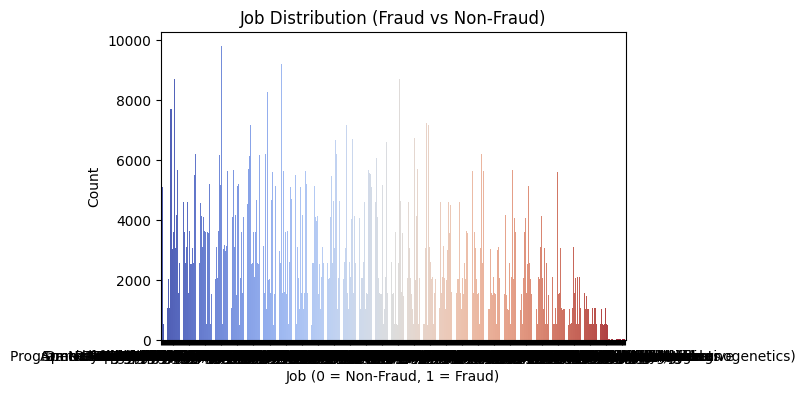

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='job',hue='job',palette='coolwarm',legend=False)
plt.title('Job Distribution (Fraud vs Non-Fraud)')
plt.xlabel('Job (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

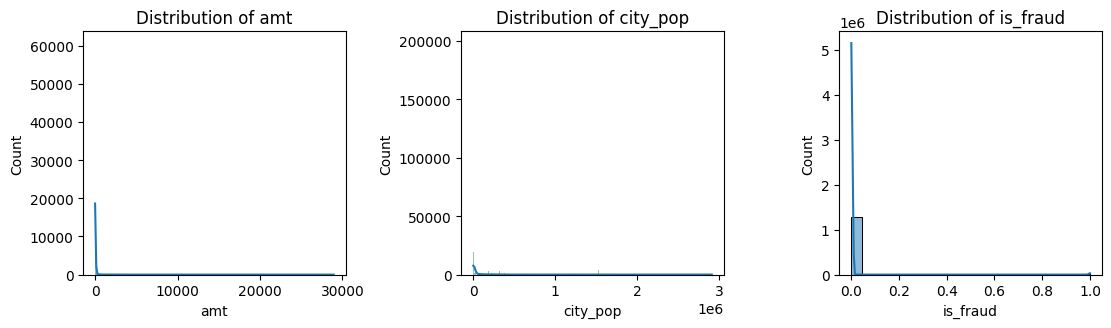

In [ ]:
# Plotting distributions of numerical features
numeric_features=df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 12))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

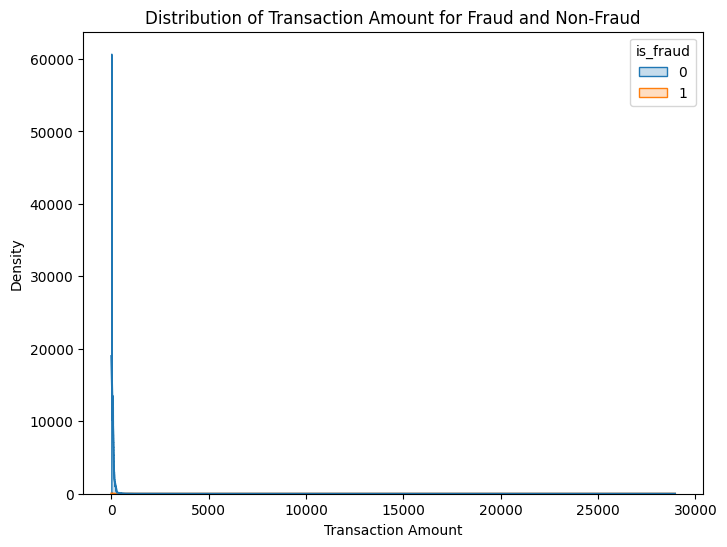

In [ ]:
# Comparing distributions of 'amount' for fraud vs. non-fraud transactions
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='amt', hue='is_fraud', element='step', kde=True)
plt.title('Distribution of Transaction Amount for Fraud and Non-Fraud')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.show()

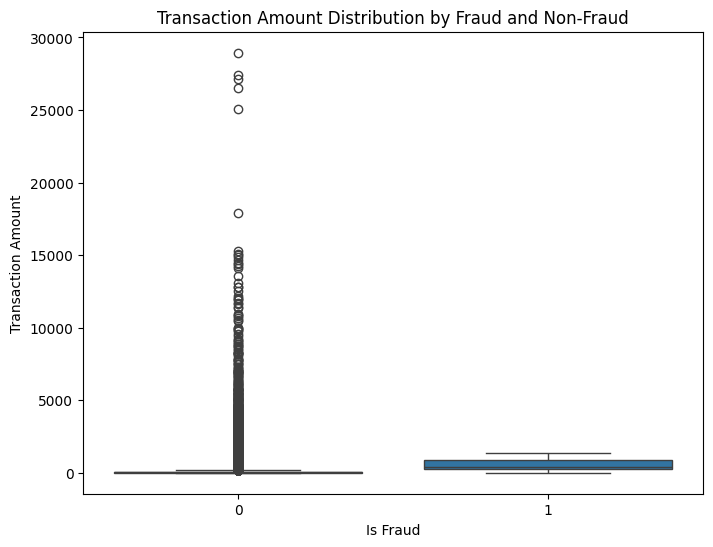

In [ ]:
# Boxplot for 'amount' by 'is_fraud'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='is_fraud', y='amt')
plt.title('Transaction Amount Distribution by Fraud and Non-Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.show()

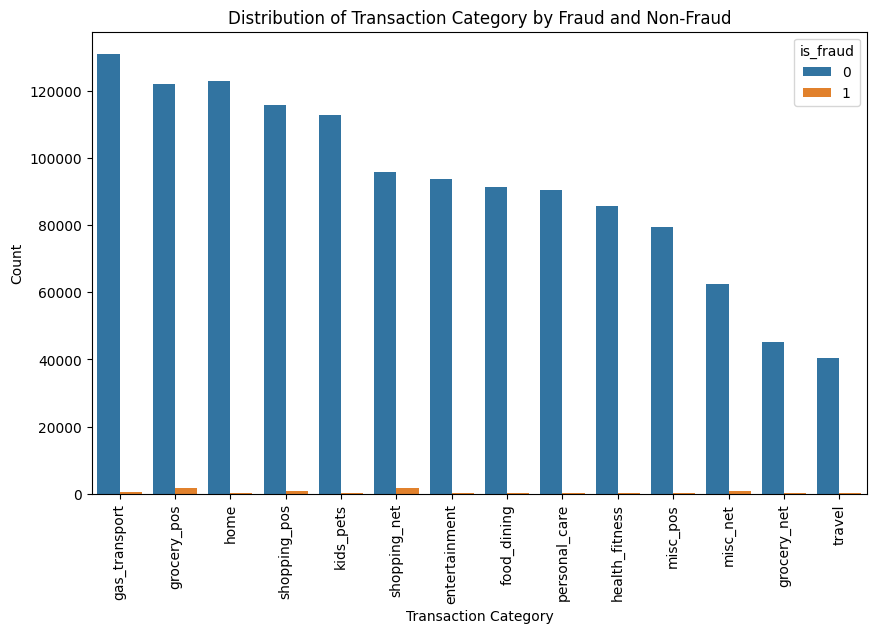

In [ ]:
# Count plot for a categorical feature (replace 'category' with actual feature name if it exists)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='category', hue='is_fraud', order=df['category'].value_counts().index)
plt.title('Distribution of Transaction Category by Fraud and Non-Fraud')
plt.xlabel('Transaction Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Encoding Data (Categorical To Numerical)

In [ ]:
df['category'].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [ ]:
category_df = (pd.get_dummies(df['category'])).astype('int')

In [ ]:
category_df.head()

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
df.drop(columns = ['category'], inplace = True)

In [ ]:
df.head(3)

,amt,gender,state,city_pop,job,is_fraud
0,4.97,F,NC,3495,"Psychologist, counselling",0
1,107.23,F,WA,149,Special educational needs teacher,0
2,220.11,M,ID,4154,Nature conservation officer,0


In [ ]:
df = pd.concat([df, category_df], axis = 1)


In [ ]:
df.head(3)


,amt,gender,state,city_pop,job,is_fraud,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,4.97,F,NC,3495,"Psychologist, counselling",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,107.23,F,WA,149,Special educational needs teacher,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,220.11,M,ID,4154,Nature conservation officer,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df['gender'].unique()


array(['F', 'M'], dtype=object)

In [ ]:
df['gender'].replace({'F' : 1, 'M' : 0}, inplace = True)


<ipython-input-29-608a043156cc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({'F' : 1, 'M' : 0}, inplace = True)
<ipython-input-29-608a043156cc>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'].replace({'F' : 1, 'M' : 0}, inplace = True)


In [ ]:
df['gender'].unique()


array([1, 0])

In [ ]:
df['state'].unique()


array(['NC', 'WA', 'ID', 'MT', 'VA', 'PA', 'KS', 'TN', 'IA', 'WV', 'FL',
       'CA', 'NM', 'NJ', 'OK', 'IN', 'MA', 'TX', 'WI', 'MI', 'WY', 'HI',
       'NE', 'OR', 'LA', 'DC', 'KY', 'NY', 'MS', 'UT', 'AL', 'AR', 'MD',
       'GA', 'ME', 'AZ', 'MN', 'OH', 'CO', 'VT', 'MO', 'SC', 'NV', 'IL',
       'NH', 'SD', 'AK', 'ND', 'CT', 'RI', 'DE'], dtype=object)

In [ ]:
state_df = (pd.get_dummies(df['state'])).astype('int')


In [ ]:
state_df.head()


,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
df.drop(columns = ['state'], inplace = True)

In [ ]:
df = pd.concat([df, state_df], axis = 1)


In [ ]:
df.head(3)


,amt,gender,city_pop,job,is_fraud,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,4.97,1,3495,"Psychologist, counselling",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,107.23,1,149,Special educational needs teacher,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,220.11,0,4154,Nature conservation officer,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df['job'].unique().shape


(494,)

In [ ]:
job_df = (pd.get_dummies(df['job'])).astype('int')


In [ ]:
job_df.head()


,Academic librarian,"Accountant, chartered","Accountant, chartered certified","Accountant, chartered public finance",Accounting technician,Acupuncturist,Administrator,"Administrator, arts","Administrator, charities/voluntary organisations","Administrator, education",...,Visual merchandiser,Volunteer coordinator,Warden/ranger,Warehouse manager,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.drop(columns = ['job'], inplace = True)


In [ ]:
df = pd.concat([df, job_df], axis = 1)


In [ ]:
df.shape


(1296675, 563)

In [ ]:
df.head(3)


,amt,gender,city_pop,is_fraud,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,...,Visual merchandiser,Volunteer coordinator,Warden/ranger,Warehouse manager,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer
0,4.97,1,3495,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,107.23,1,149,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,220.11,0,4154,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Dividing The Dataset

In [ ]:
X = df.drop(columns = ['is_fraud'])
y = df['is_fraud']

In [ ]:
X.shape


(1296675, 562)

In [ ]:
y.value_counts()


,count
is_fraud,
0,1289169
1,7506


In [ ]:
!pip install imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 3.6 MB/s eta 0:00:00


# SMOTE (For Balancing The Dataset)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
X, y = smote.fit_resample(X, y)

In [ ]:
y.value_counts()


,count
is_fraud,
0,1289169
1,1289169


In [ ]:
X.shape


(2578338, 562)

# Data Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[:] = scaler.fit_transform(X)

<ipython-input-51-4eed4c741159>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.19449117e-03 4.33484697e-05 1.42121054e-03 ... 1.03210642e-04
 4.95882411e-02 7.68919285e-04]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X[:] = scaler.fit_transform(X)


In [ ]:
X.head()


,amt,gender,city_pop,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,...,Visual merchandiser,Volunteer coordinator,Warden/ranger,Warehouse manager,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer
0,0.000137,1,0.001194,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.003670,1,0.000043,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.007569,0,0.001421,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.001520,0,0.000659,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.001415,0,0.000026,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Splitting The Dataset Into Training And Testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [ ]:
X_train.shape, X_test.shape


((2062670, 562), (515668, 562))

## The model used is  Artificial Neural Network (ANN) for binary classification, trained with two hidden layers using ReLU activation. It uses the Adam optimizer and binary cross-entropy loss to classify instances as either fraudulent or non-fraudulent, using a 562-dimensional feature vector as input.

In [ ]:
model = keras.Sequential([
    # Define the input layer separately
    keras.layers.Input(shape=(562,)),             # Input Layer
    keras.layers.Dense(300, activation='relu'),   # Hidden Layer 1
    keras.layers.Dense(150, activation='relu'),   # Hidden Layer 2
    keras.layers.Dense(1, activation='sigmoid')   # Output Layer
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Check the X_train shape if it is correct or not
print(X_train.shape)
model.fit(X_train, y_train, epochs=10, batch_size=200)


(2062670, 562)
Epoch 1/10
10314/10314 [==============================] - 46s 4ms/step - loss: 0.0554 - accuracy: 0.9777
Epoch 2/10
10314/10314 [==============================] - 46s 4ms/step - loss: 0.0275 - accuracy: 0.9888
Epoch 3/10
10314/10314 [==============================] - 45s 4ms/step - loss: 0.0233 - accuracy: 0.9903
Epoch 4/10
10314/10314 [==============================] - 45s 4ms/step - loss: 0.0208 - accuracy: 0.9914
Epoch 5/10
10314/10314 [==============================] - 46s 4ms/step - loss: 0.0189 - accuracy: 0.9922
Epoch 6/10
10314/10314 [==============================] - 46s 4ms/step - loss: 0.0174 - accuracy: 0.9930
Epoch 7/10
10314/10314 [==============================] - 45s 4ms/step - loss: 0.0161 - accuracy: 0.9934
Epoch 8/10
10314/10314 [==============================] - 46s 4ms/step - loss: 0.0151 - accuracy: 0.9939
Epoch 9/10
10314/10314 [==============================] - 45s 4ms/step - loss: 0.0144 - accuracy: 0.9942
Epoch 10/10
10314/10314 [===============

# Model Evaluation And Visualizing the Metrics

16115/16115 [==============================] - 27s 2ms/step - loss: 0.0146 - accuracy: 0.9947
Model Accuracy: 99.47%
Model Loss: 0.0146


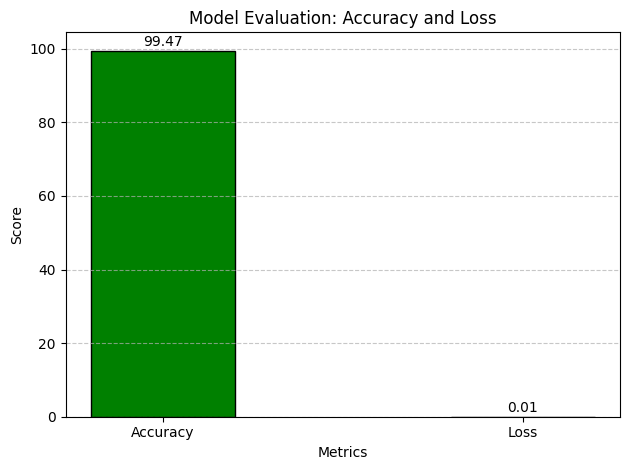

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

# Print the results
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(f"Model Loss: {loss:.4f}")

# Data for visualization
final_metrics = ['Accuracy', 'Loss']
final_values = [accuracy * 100, loss]  # Scale accuracy for visualization
colors = ['green', '#FF6347']  # Use a brighter shade of red

# Bar plot for visualizing scaled accuracy and loss
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Plot bars with edge color for better visibility
bars = ax.bar(final_metrics, final_values, color=colors, edgecolor='black', width=0.4)

# Add titles and labels
ax.set_title('Model Evaluation: Accuracy and Loss')
ax.set_xlabel('Metrics')
ax.set_ylabel('Score')

# Add value annotations
for bar, value in zip(bars, [accuracy * 100, loss]):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Add gridlines for better readability
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


# Predicting the probabilities for the positive class , Computing And Visualizing The ROC Curve

16115/16115 [==============================] - 25s 2ms/step


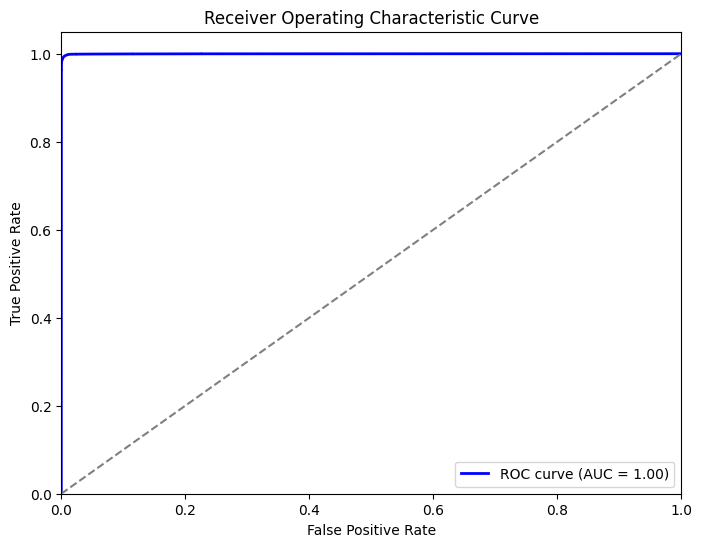

In [ ]:
y_pred_prob = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               168900    
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 1)                 151       
                                                                 
Total params: 214201 (836.72 KB)
Trainable params: 214201 (836.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
pred = model.predict(X_test)


16115/16115 [==============================] - 25s 2ms/step


In [ ]:
binary_pred = (pred > 0.5).astype('int')

In [ ]:
binary_pred


array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, binary_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    257834
           1       0.99      1.00      0.99    257834

    accuracy                           0.99    515668
   macro avg       0.99      0.99      0.99    515668
weighted avg       0.99      0.99      0.99    515668



# Confusion Matrix

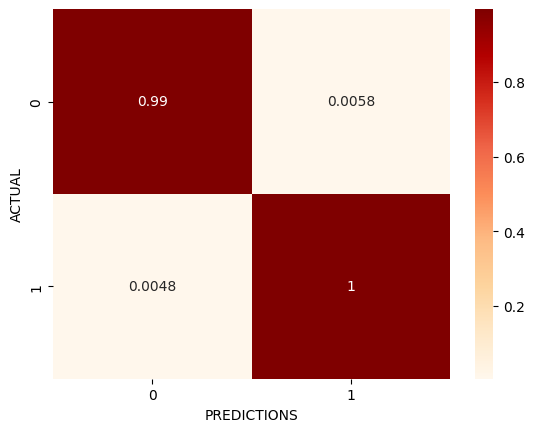

In [ ]:
cf = confusion_matrix(y_test, binary_pred, normalize = 'true')
sns.heatmap(cf, annot = True, cmap = 'OrRd');
plt.xlabel('PREDICTIONS');
plt.ylabel('ACTUAL');

# Using Plotly library to get the Transaction locations with Fraud Detection

In [ ]:
import plotly.express as px
sample_data = pd.DataFrame({
    'lat': np.random.uniform(25, 50, 500),
    'long': np.random.uniform(-125, -66, 500),
    'is_fraud': np.random.choice([0, 1], size=500, p=[0.9, 0.1])  # 90% non-fraud, 10% fraud
})
fig = px.scatter_mapbox(
    sample_data,
    lat="lat",
    lon="long",
    color="is_fraud",
    color_continuous_scale=["blue", "red"],
    title="Transaction Locations with Fraud Indication",
    labels={"is_fraud": "Fraud Indicator"},
    zoom=3,
    mapbox_style="carto-positron"
)
fig.update_layout(
    margin={"r":0,"t":40,"l":0,"b":0}
)
fig.show()